EMAIL SPAM PROJECT


MULTINOMIAL NAIVE BAYES ALGORITHM IMPLEMENTATION

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
import matplotlib.pyplot as plt
email_data = pd.read_csv("lingSpam.csv",error_bad_lines=False)
email_data.head()

2023-03-28 10:57:26.642285: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/var/folders/fr/zztw88ms6h79jk_9h6s3zsmh0000gn/T/ipykernel_28757/2087984903.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  email_data = pd.read_csv("lingSpam.csv",error_bad_lines=False)


,Unnamed: 0,Body,Label
0,0,Subject: great part-time or summer job !\n \n ...,1
1,1,Subject: auto insurance rates too high ?\n \n ...,1
2,2,Subject: do want the best and economical hunti...,1
3,3,Subject: email 57 million people for $ 99\n \n...,1
4,4,Subject: do n't miss these !\n \n attention ! ...,1


In [2]:
email_X = email_data.Body
email_Y = email_data.Label
email_X.head()

0    Subject: great part-time or summer job !\n \n ...
1    Subject: auto insurance rates too high ?\n \n ...
2    Subject: do want the best and economical hunti...
3    Subject: email 57 million people for $ 99\n \n...
4    Subject: do n't miss these !\n \n attention ! ...
Name: Body, dtype: object

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(email_X, email_Y, test_size=0.2)

In [4]:
# Convert text to numbers using Count Vectorization technique
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
words_trainset = vectorizer.fit_transform(X_train)
words_testset = vectorizer.transform(X_test) # Not sure why fit_transform doesn't work
words_testset

<521x51310 sparse matrix of type '<class 'numpy.int64'>'
	with 160275 stored elements in Compressed Sparse Row format>

In [5]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(words_trainset, Y_train)
MNBReport = model.score(words_testset, Y_test)
MNBReport

0.9980806142034548

In [6]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])
clf.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [7]:
clf.score(X_test, Y_test)

0.9980806142034548

WORD EMBEDDING

In [8]:
email_data.isna().sum()

Unnamed: 0    0
Body          0
Label         0
dtype: int64

<Axes: xlabel='Label', ylabel='count'>

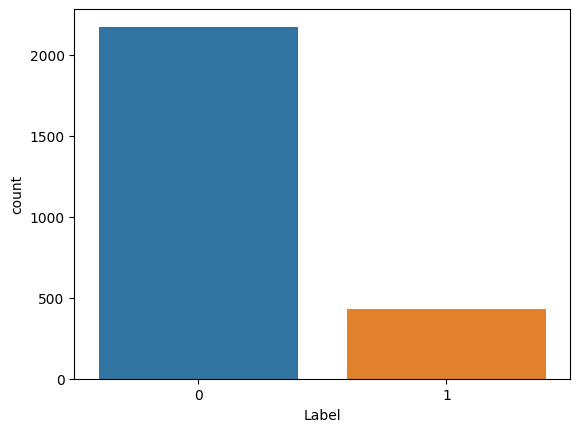

In [9]:
import seaborn as sns
sns.countplot(x="Label",data=email_data)

In [10]:
print(email_data['Body'][0])

Subject: great part-time or summer job !
 
 * * * * * * * * * * * * * * * we have display boxes with credit applications that we need to place in the small owner-operated stores in your area . here is what you do : 1 . introduce yourself to the store owner or manager . 2 . use our 90 % effective script which tells them how this little display box will save their customers hundreds of dollars , be a drawing card for their business , and make them from $ 5 . 00 to $ 15 . 00 or more for every app sent in . 3 . find a good spot on the counter , place the box there , and say that nothing more need be done , all you need is his name and address so the company can send him the commission checks . your compensaation will be $ 10 for every box you place . by becoming a representative you could also earn a commission of $ 10 for each application that came from that store . that is of course a much more profitable plan , as it will pay you for months or years for a very small effort . call 1-888 

In [11]:
import contractions
#contractions is the package in python used to expand the contractions in english language to their original form. Example: I'll to "I will"
from tqdm import tqdm
#tqdm package is used to track the progress of work. It displays the percentage of loop done.
import nltk
#nltk is a suite of libraries that are mainly used for dealing with problems related to Natural language processing.
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
#donwloadin the stopwords of english language
stopwords=stopwords.words('english')
#Removing stopwords 'no','nor' and 'not'
stopwords.remove('no')
stopwords.remove('nor')
stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dhanush/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
processed_mails=[]
for i in tqdm(email_data['Body']):
    #Regular expression that removes all the html tags pressent in the reviews
    i=re.sub('(<[\w\s]*/?>)',"",i)
    #Expanding all the contractions present in the review to is respective actual form
    i=contractions.fix(i)
    #Removing all the special charactesrs from the review text
    i=re.sub('[^a-zA-Z0-9\s]+',"",i)
    #Removing all the digits present in the review text
    i=re.sub('\d+',"",i)
    #Making all the review text to be of lower case as well as removing the stopwords and words of length less than 3
    processed_mails.append(" ".join([j.lower() for j in i.split() if j not in stopwords and len(j)>=3]))

100%|██████████| 2605/2605 [00:06<00:00, 404.32it/s] 


In [13]:
#Creating a new datafram using the Processed Reviews
processed_df=pd.DataFrame({'Body':processed_mails,'Spam/Ham':list(email_data['Label'])})
processed_df.head()

,Body,Spam/Ham
0,subject great parttime summer job display boxe...,1
1,subject auto insurance rates high dear nlpeopl...,1
2,subject want best economical hunting vacation ...,1
3,subject email million people million email add...,1
4,subject miss attention warning adults warning ...,1


In [14]:
#Splitting the data into dependent and independent variables i.e, features and the target columns
X=processed_df['Body']
Y=processed_df['Spam/Ham']
#Splitting the data such that 33% will be used for testing and the remaining 67% will be used for training. 
from sklearn.model_selection import train_test_split
X_trainset,X_testset,Y_trainset,Y_testset=train_test_split(X,Y,stratify=Y,test_size=0.33)
#when stratify is provided the splitting of data into train and test datasets agree with the composition of actual possitive and negative reviews present in the dataset

In [15]:

from tqdm import tqdm
from gensim.models import Word2Vec

words_in_sentences=[]
for i in tqdm(X_trainset):
    words_in_sentences.append(i.split())

100%|██████████| 1745/1745 [00:00<00:00, 18653.32it/s]


In [16]:
model = Word2Vec(sentences=words_in_sentences, vector_size=200,workers=-1)

In [17]:
model.wv.get_vector('job')

array([-4.5737922e-03, -1.5037578e-03, -2.7729513e-04, -4.8731412e-03,
       -9.7830174e-04, -2.4580841e-03,  5.3975941e-04, -3.3014214e-03,
       -1.4232218e-04,  3.2142431e-03,  7.8719022e-04, -1.7757928e-03,
       -2.1350682e-04,  3.0733841e-03,  8.3896937e-04,  1.0660589e-04,
       -2.9115318e-03,  3.6753118e-03,  9.3460083e-05,  1.4228160e-03,
        3.2633983e-03,  2.9351283e-03, -4.1754092e-03, -3.5712367e-03,
        1.4307743e-03,  1.5412563e-03,  1.5625518e-03, -1.6039514e-03,
       -2.8723467e-03, -6.4418791e-04, -1.3824760e-04,  2.6353169e-03,
       -3.3723307e-03, -1.5907257e-03,  4.4302149e-03,  2.8787255e-05,
        2.4230224e-03, -2.3399282e-03, -2.7229404e-03,  3.8053500e-03,
        2.7718276e-03,  3.3019024e-03, -4.5034355e-03,  2.6219373e-03,
        3.2866823e-03, -3.1170922e-03, -7.2799326e-04,  3.8397007e-03,
       -1.0170996e-03,  2.2035646e-03,  4.1748541e-03,  4.5755436e-03,
       -4.9758200e-03, -8.9152157e-04, -3.5535903e-03, -1.1815215e-03,
      

In [18]:
vocab=list(model.wv.key_to_index.keys())
print(len(vocab))

27338


In [19]:
def avg_w2vec(sentences):
    transformed=[]
    for sentence in tqdm(sentences):
        count=0
        vector=np.zeros(200)
        for word in sentence.split():
            if word in vocab:
                vector+=model.wv.get_vector(word)
                count+=1
        if count!=0:
            vector/=count
            transformed.append(vector)
        else:
            print(sentence)
    return np.array(transformed)

In [20]:
x_train_transformed=avg_w2vec(X_trainset)
x_test_transformed=avg_w2vec(X_testset)

100%|██████████| 860/860 [00:10<00:00, 78.45it/s] 


**SHALLOW ALGORITHMS IMPLEMENTATION**



1.   K Nearest Neighbor
2.   Decision Tree
3.   Support Vector Machine



In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train_transformed,Y_trainset)


KNeighborsClassifier()

In [22]:
from sklearn.metrics import classification_report
KnnRes = classification_report(Y_testset,knn.predict(x_test_transformed))
print(KnnRes)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       717
           1       0.85      0.69      0.76       143

    accuracy                           0.93       860
   macro avg       0.90      0.83      0.86       860
weighted avg       0.93      0.93      0.93       860



In [23]:
KnnReport = KnnRes.split()[15]

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
decisiontree = DecisionTreeClassifier()

# Train Decision Tree Classifer
decisiontree.fit(x_train_transformed,Y_trainset)


DecisionTreeClassifier()

In [25]:
from sklearn.metrics import classification_report
DTRes = classification_report(Y_testset,decisiontree.predict(x_test_transformed))
print(DTRes)

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       717
           1       0.44      0.47      0.45       143

    accuracy                           0.81       860
   macro avg       0.67      0.67      0.67       860
weighted avg       0.82      0.81      0.81       860



In [26]:
DTReport = DTRes.split()[15]
DTReport

'0.81'

In [27]:
from sklearn.svm import SVC # "Support vector classifier"  
SVM = SVC(kernel='linear', random_state=0)  
SVM.fit(x_train_transformed,Y_trainset)


SVC(kernel='linear', random_state=0)

In [28]:
from sklearn.metrics import classification_report
SVMRes = classification_report(Y_testset,SVM.predict(x_test_transformed))
print(SVMRes)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       717
           1       0.00      0.00      0.00       143

    accuracy                           0.83       860
   macro avg       0.42      0.50      0.45       860
weighted avg       0.70      0.83      0.76       860



/Users/dhanush/opt/anaconda3/envs/MlLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dhanush/opt/anaconda3/envs/MlLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dhanush/opt/anaconda3/envs/MlLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [29]:
SVMReport = SVMRes.split()[15]
SVMReport

'0.83'

In [30]:
data = email_data
data=data[~data['Label'].isin(['0','1'])]

In [31]:
# Preprocess the text data
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['Body'])
sequences = tokenizer.texts_to_sequences(data['Body'])
padded_sequences = pad_sequences(sequences, maxlen=100, truncating='post')

In [32]:
# Split the data into training and testing sets
train_data = padded_sequences[:2000]
train_labels = data['Label'][:2000]
test_data = padded_sequences[2000:]
test_labels = data['Label'][2000:]

In [33]:
# Define the model architecture
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=100),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

2023-03-28 10:59:18.251793: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [34]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
# Train the model
model.fit(train_data, train_labels, epochs=10, verbose=True)

Epoch 1/10
63/63 [==============================] - 3s 27ms/step - loss: 0.4695 - accuracy: 0.7965
Epoch 2/10
63/63 [==============================] - 2s 27ms/step - loss: 0.1375 - accuracy: 0.9775
Epoch 3/10
63/63 [==============================] - 2s 27ms/step - loss: 0.0745 - accuracy: 0.9855
Epoch 4/10
63/63 [==============================] - 2s 27ms/step - loss: 0.0141 - accuracy: 0.9985
Epoch 5/10
63/63 [==============================] - 2s 27ms/step - loss: 0.0065 - accuracy: 0.9995
Epoch 6/10
63/63 [==============================] - 2s 26ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 7/10
63/63 [==============================] - 2s 26ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 8/10
63/63 [==============================] - 2s 27ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 9/10
63/63 [==============================] - 2s 26ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 10/10
63/63 [==============================] - 2s 26ms/step - loss: 0.0013 - accuracy: 1.0000


In [36]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {accuracy:.3f}')
RNNReport = accuracy

19/19 [==============================] - 0s 6ms/step - loss: 0.0402 - accuracy: 0.9934
Test accuracy: 0.993


In [37]:
ModelCompare ={
    'MNB' : MNBReport,
    'KNN' : KnnReport,
    'DT' : DTReport,
    'SVM' : SVMReport,
    'RNN' : RNNReport
}
model = pd.DataFrame.from_dict(ModelCompare,orient = 'index',columns=['Accuracy'] )
model.reset_index(inplace=True)
model.rename(columns={'index': 'models'}, inplace=True)
print(model)


  models  Accuracy
0    MNB  0.998081
1    KNN      0.93
2     DT      0.81
3    SVM      0.83
4    RNN  0.993388


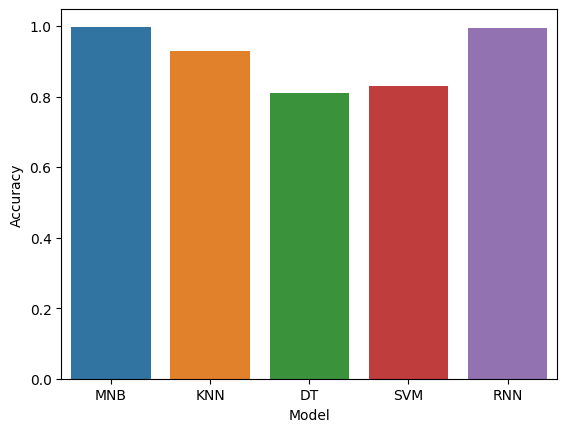

In [39]:
sns.barplot(data= [[MNBReport],[KnnReport],[DTReport],[SVMReport],[RNNReport]])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(range(len(model['models'].unique())),model['models'].unique() )
plt.show()